In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

In [46]:
start ="2010-01-01"
end = "2022-01-01"
df = pd.read_csv('../TSLA.csv')
#data.DataReader("AAPL", "yahoo", start, end)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444380
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556002
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439794
...,...,...,...,...,...,...
2021-12-27,180.419998,177.070007,177.089996,180.330002,74919600.0,180.100540
2021-12-28,181.330002,178.529999,180.160004,179.289993,79144300.0,179.061859
2021-12-29,180.630005,178.139999,179.330002,179.380005,62348900.0,179.151749


In [41]:
#feture extraction
df.shape
df = df['Close'].values
df = df.reshape(-1, 1)

[[ 4.392   ]
 [ 3.84    ]
 [ 3.222   ]
 ...
 [86.075996]
 [82.940002]
 [83.666   ]]


In [25]:
#split trainnig and testing dataset 80% for training and 20% for testing
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])

In [26]:
#scale data using MinmaxScaller
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_test = scaler.transform(dataset_test)

In [27]:
#create dataset function
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [28]:
#create training and testing data
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

In [29]:
#reshape dataset
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [30]:
#model
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

2022-05-01 16:28:07.192890: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-01 16:28:07.192928: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-01 16:28:07.192942: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (synotech): /proc/driver/nvidia/version does not exist
2022-05-01 16:28:07.193115: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [31]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [32]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [33]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
59/59 [==============================] - 10s 85ms/step - loss: 0.0196
Epoch 2/50
59/59 [==============================] - 5s 87ms/step - loss: 0.0036
Epoch 3/50
59/59 [==============================] - 6s 98ms/step - loss: 0.0032
Epoch 4/50
59/59 [==============================] - 7s 116ms/step - loss: 0.0034
Epoch 5/50
59/59 [==============================] - 7s 113ms/step - loss: 0.0027
Epoch 6/50
59/59 [==============================] - 7s 113ms/step - loss: 0.0030
Epoch 7/50
59/59 [==============================] - 7s 112ms/step - loss: 0.0031
Epoch 8/50
59/59 [==============================] - 7s 114ms/step - loss: 0.0026
Epoch 9/50
59/59 [==============================] - 6s 108ms/step - loss: 0.0024
Epoch 10/50
59/59 [==============================] - 7s 112ms/step - loss: 0.0021
Epoch 11/50
59/59 [==============================] - 6s 106ms/step - loss: 0.0021
Epoch 12/50
59/59 [==============================] - 7s 116ms/step - loss: 0.0026
Epoch 13/50
59/59 [========

In [34]:
model = load_model('stock_prediction.h5')

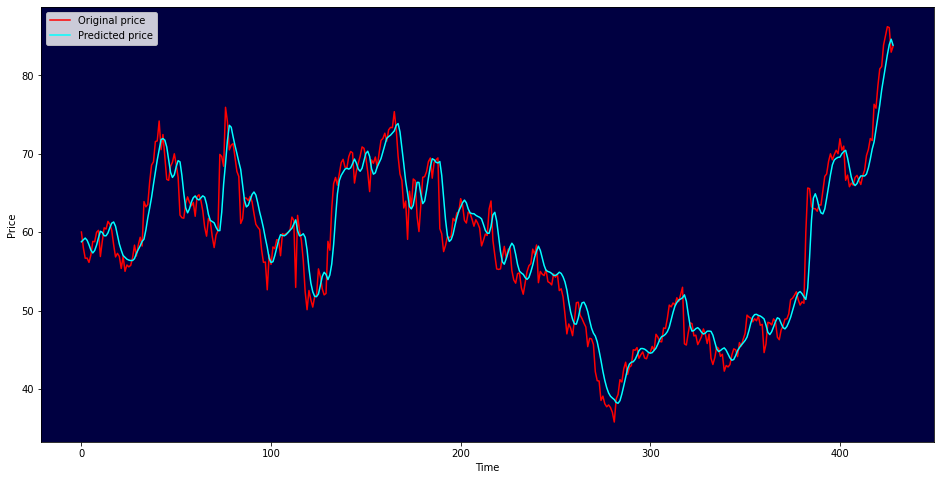

In [42]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()